In [1]:
#DS Basics

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#helpers
%matplotlib inline

In [4]:
data = pd.read_csv('default of credit card clients1.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TYPE,TYPE2
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,1
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,1
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,0
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,0
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,0


In [94]:
data.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TYPE2
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  int64 
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [6]:
data = data.drop_duplicates()

In [7]:
#select columns
data1 = data.loc[:, ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','TYPE','TYPE2','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] 
print('Selected Columns')
data1.head()

Selected Columns


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,female,university,1,24,default,1,2,2,-1,-1,-2,-2
1,120000,female,university,2,26,default,1,-1,2,0,0,0,2
2,90000,female,university,2,34,not default,0,0,0,0,0,0,0
3,50000,female,university,1,37,not default,0,0,0,0,0,0,0
4,50000,male,university,1,57,not default,0,-1,0,-1,0,0,0


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  int64 
 4   AGE        30000 non-null  int64 
 5   TYPE       30000 non-null  object
 6   TYPE2      30000 non-null  int64 
 7   PAY_0      30000 non-null  int64 
 8   PAY_2      30000 non-null  int64 
 9   PAY_3      30000 non-null  int64 
 10  PAY_4      30000 non-null  int64 
 11  PAY_5      30000 non-null  int64 
 12  PAY_6      30000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 3.2+ MB


In [9]:
#AGE BIN
bins = [0,25,43,54,85]
#group names
gen = ['Gen Z','Millennial','Gen X','Boomer']

In [10]:
data1['Generation'] = pd.cut(data1.AGE, bins, labels = gen)

In [11]:
#CREDIT LIMIT BIN 
binslimit = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1000000]
#group names
limits = ['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250-300k','300k-350k','350k-400k','400k-1000k']

In [12]:
data1['LIMIT_BIN'] = pd.cut(data1.LIMIT_BAL, binslimit, labels = limits)

In [13]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Generation,LIMIT_BIN
0,20000,female,university,1,24,default,1,2,2,-1,-1,-2,-2,Gen Z,0-50k
1,120000,female,university,2,26,default,1,-1,2,0,0,0,2,Millennial,100k-150k
2,90000,female,university,2,34,not default,0,0,0,0,0,0,0,Millennial,50k-100k
3,50000,female,university,1,37,not default,0,0,0,0,0,0,0,Millennial,0-50k
4,50000,male,university,1,57,not default,0,-1,0,-1,0,0,0,Boomer,0-50k


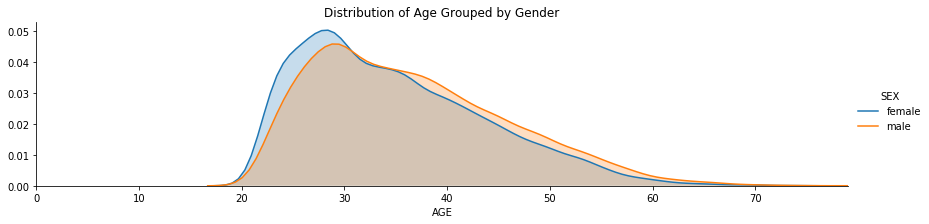

In [14]:
fig = sns.FacetGrid(data1, hue='SEX', aspect= 4) 
fig.map(sns.kdeplot, 'AGE', shade=True) 
oldest = data1['AGE'].max() 
fig.set(xlim=(0,oldest)) 
fig.set(title='Distribution of Age Grouped by Gender') 
fig.add_legend()

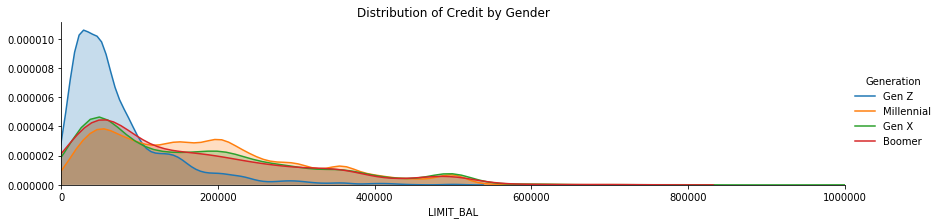

In [15]:
fig = sns.FacetGrid(data1, hue='Generation', aspect= 4) 
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True) 
top = data1['LIMIT_BAL'].max() 
fig.set(xlim=(0,top)) 
fig.set(title='Distribution of Credit by Gender') 
fig.add_legend()

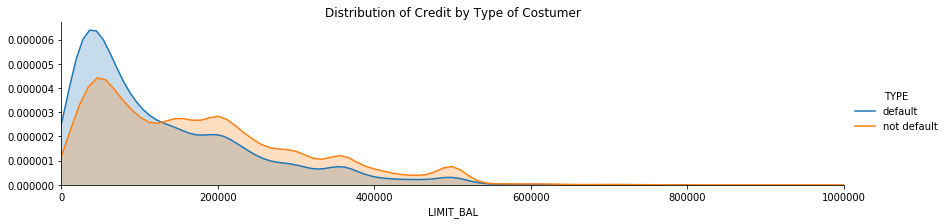

In [16]:
fig = sns.FacetGrid(data1, hue='TYPE', aspect= 4) 
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True) 
top = data1['LIMIT_BAL'].max() 
fig.set(xlim=(0,top)) 
fig.set(title='Distribution of Credit by Type of Costumer') 
fig.add_legend()

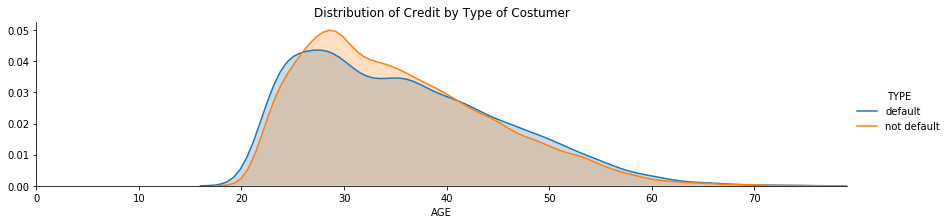

In [17]:
fig = sns.FacetGrid(data1, hue='TYPE', aspect= 4) 
fig.map(sns.kdeplot, 'AGE', shade=True) 
top = data1['AGE'].max() 
fig.set(xlim=(0,top)) 
fig.set(title='Distribution of Credit by Type of Costumer') 
fig.add_legend()

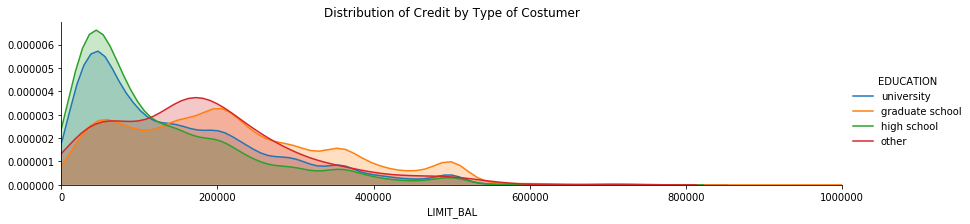

In [18]:
fig = sns.FacetGrid(data1, hue='EDUCATION', aspect= 4) 
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True) 
top = data1['LIMIT_BAL'].max() 
fig.set(xlim=(0,top)) 
fig.set(title='Distribution of Credit by Type of Costumer') 
fig.add_legend()

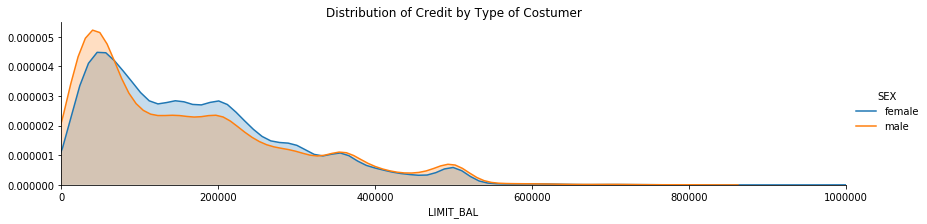

In [19]:
fig = sns.FacetGrid(data1, hue='SEX', aspect= 4) 
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True) 
top = data1['LIMIT_BAL'].max() 
fig.set(xlim=(0,top)) 
fig.set(title='Distribution of Credit by Type of Costumer') 
fig.add_legend()

In [20]:
data1.groupby('LIMIT_BIN')['LIMIT_BIN'].count()

LIMIT_BIN
0-50k         7676
50k-100k      4822
100k-150k     3902
150k-200k     3978
200k-250k     2905
250-300k      2154
300k-350k     1206
350k-400k     1553
400k-1000k    1804
Name: LIMIT_BIN, dtype: int64

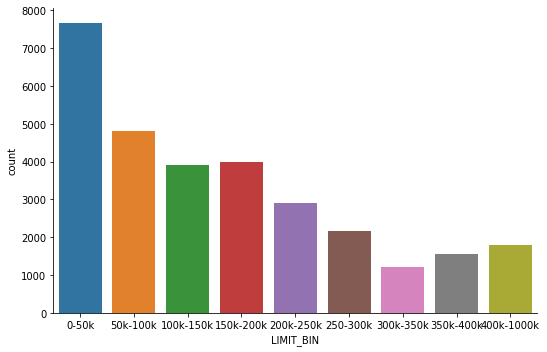

In [21]:
sns.catplot('LIMIT_BIN', data=data1, kind='count', aspect=1.5)

In [22]:
data1.groupby('Generation')['Generation'].count()

Generation
Gen Z          3871
Millennial    20143
Gen X          4933
Boomer         1053
Name: Generation, dtype: int64

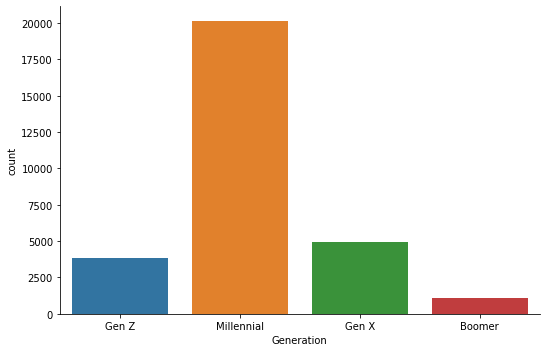

In [23]:
sns.catplot('Generation', data=data1, kind='count', aspect=1.5)

In [24]:
data1.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    10585
high school         4917
other                468
university         14030
Name: EDUCATION, dtype: int64

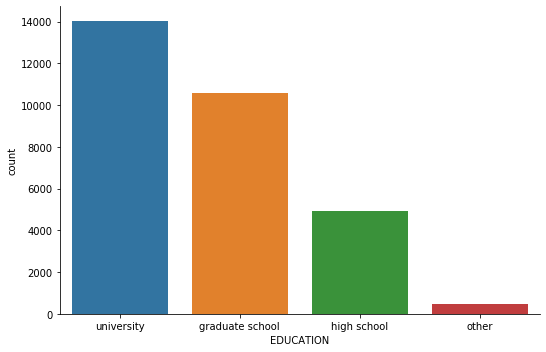

In [25]:
sns.catplot('EDUCATION', data=data1, kind='count', aspect=1.5)

In [26]:
data1.groupby('SEX')['SEX'].count()

SEX
female    18112
male      11888
Name: SEX, dtype: int64

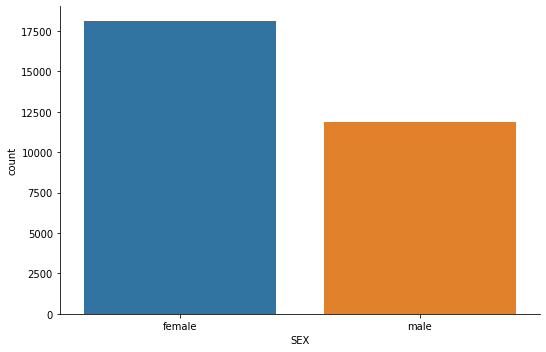

In [27]:
sns.catplot('SEX', data=data1, kind='count', aspect=1.5)

In [28]:
data1.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

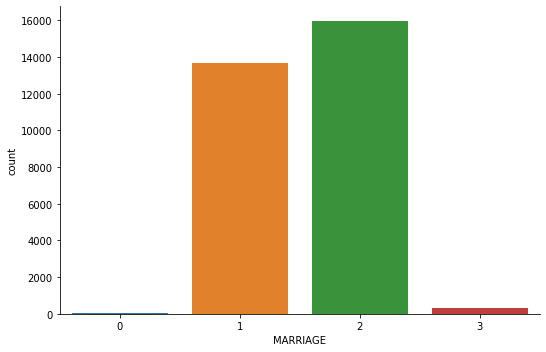

In [29]:
sns.catplot('MARRIAGE', data=data1, kind='count', aspect=1.5)

In [30]:
data1.groupby('TYPE')['TYPE'].count()

TYPE
default         6636
not default    23364
Name: TYPE, dtype: int64

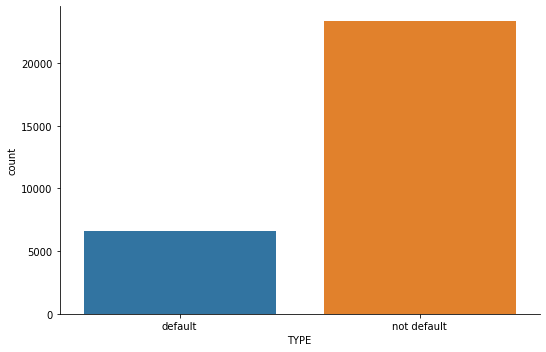

In [31]:
sns.catplot('TYPE', data=data1, kind='count', aspect=1.5)

In [32]:
data1.groupby(['LIMIT_BIN', 'TYPE'])['SEX'].count()

LIMIT_BIN   TYPE       
0-50k       default        2440
            not default    5236
50k-100k    default        1244
            not default    3578
100k-150k   default         825
            not default    3077
150k-200k   default         710
            not default    3268
200k-250k   default         480
            not default    2425
250-300k    default         332
            not default    1822
300k-350k   default         157
            not default    1049
350k-400k   default         231
            not default    1322
400k-1000k  default         217
            not default    1587
Name: SEX, dtype: int64

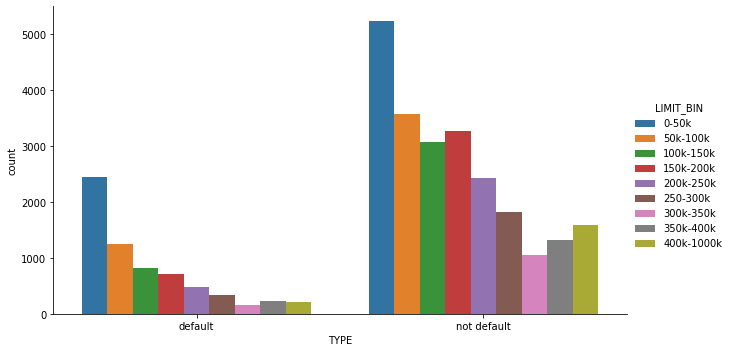

In [33]:
g = sns.catplot('TYPE', data = data1, hue= 'LIMIT_BIN', kind='count', aspect=1.75) 
g.set_xlabels('TYPE')

In [34]:
data1.groupby(['SEX', 'TYPE'])['SEX'].count()

SEX     TYPE       
female  default         3763
        not default    14349
male    default         2873
        not default     9015
Name: SEX, dtype: int64

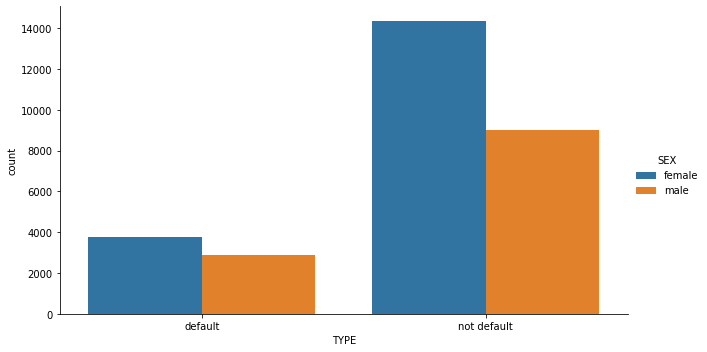

In [35]:
g = sns.catplot('TYPE', data = data1, hue= 'SEX', kind='count', aspect=1.75) 
g.set_xlabels('TYPE')


In [36]:
data1.groupby(['SEX', 'Generation'])['SEX'].count()

SEX     Generation
female  Gen Z          2706
        Millennial    12148
        Gen X          2748
        Boomer          510
male    Gen Z          1165
        Millennial     7995
        Gen X          2185
        Boomer          543
Name: SEX, dtype: int64

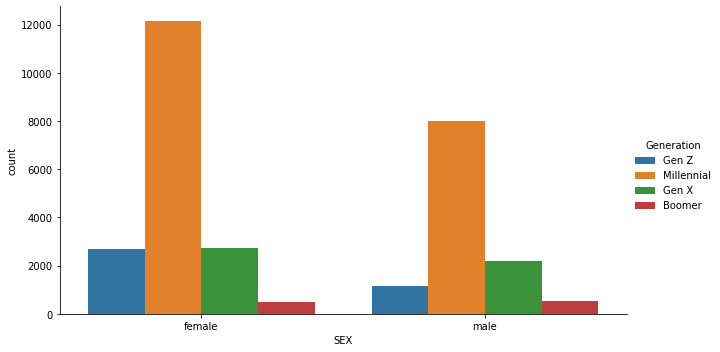

In [37]:
g = sns.catplot('SEX', data = data1, hue= 'Generation', kind='count', aspect=1.75) 
g.set_xlabels('SEX')

In [38]:
data1.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION      
female  graduate school    6231
        high school        2927
        other               298
        university         8656
male    graduate school    4354
        high school        1990
        other               170
        university         5374
Name: SEX, dtype: int64

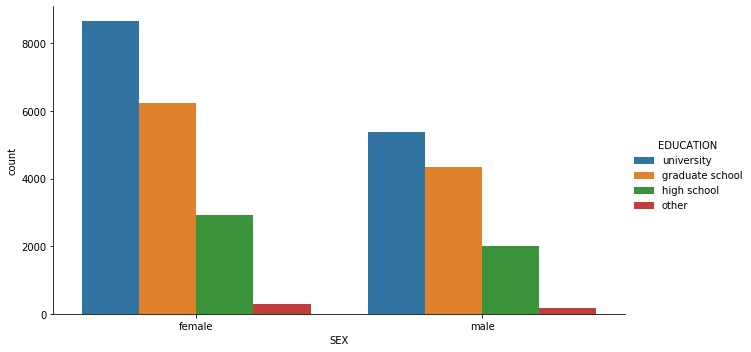

In [39]:
g = sns.catplot('SEX', data = data1, hue= 'EDUCATION', kind='count', aspect=1.75) 
g.set_xlabels('SEX')

In [40]:
data1.groupby(['TYPE', 'EDUCATION'])['TYPE'].count()

TYPE         EDUCATION      
default      graduate school     2036
             high school         1237
             other                 33
             university          3330
not default  graduate school     8549
             high school         3680
             other                435
             university         10700
Name: TYPE, dtype: int64

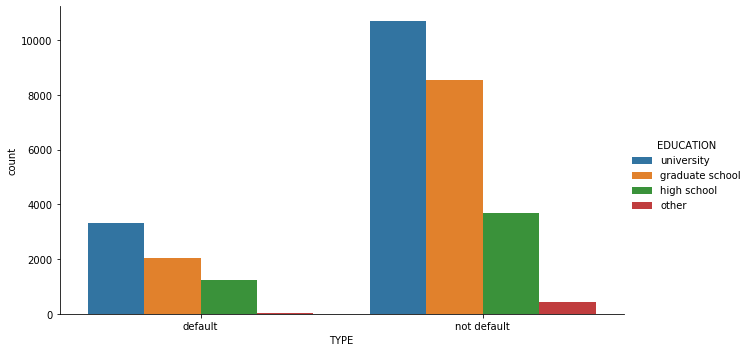

In [41]:
g = sns.catplot('TYPE', data = data1, hue= 'EDUCATION', kind='count', aspect=1.75) 
g.set_xlabels('TYPE')

In [42]:
data1.groupby(['TYPE', 'MARRIAGE'])['TYPE'].count()

TYPE         MARRIAGE
default      0               5
             1            3206
             2            3341
             3              84
not default  0              49
             1           10453
             2           12623
             3             239
Name: TYPE, dtype: int64

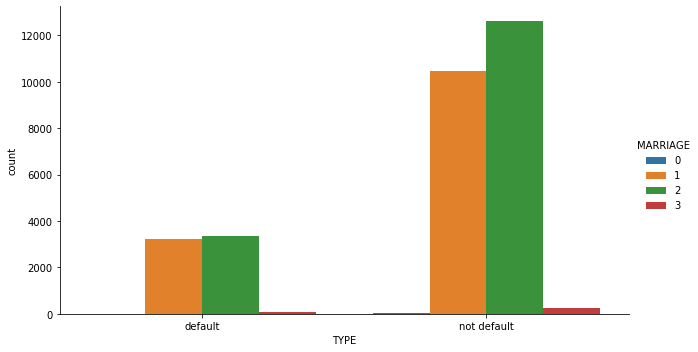

In [43]:
g = sns.catplot('TYPE', data = data1, hue= 'MARRIAGE', kind='count', aspect=1.75) 
g.set_xlabels('TYPE')

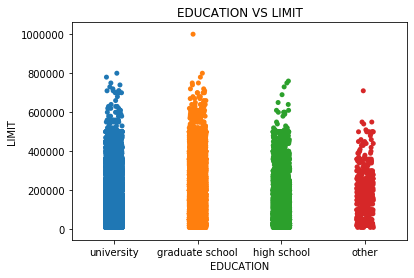

In [44]:
sns.stripplot(data1.EDUCATION, data1.LIMIT_BAL, jitter=True)
plt.title('EDUCATION VS LIMIT')
plt.xlabel('EDUCATION')
plt.ylabel('LIMIT')
plt.show()

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LIMIT_BAL   30000 non-null  int64   
 1   SEX         30000 non-null  object  
 2   EDUCATION   30000 non-null  object  
 3   MARRIAGE    30000 non-null  int64   
 4   AGE         30000 non-null  int64   
 5   TYPE        30000 non-null  object  
 6   TYPE2       30000 non-null  int64   
 7   PAY_0       30000 non-null  int64   
 8   PAY_2       30000 non-null  int64   
 9   PAY_3       30000 non-null  int64   
 10  PAY_4       30000 non-null  int64   
 11  PAY_5       30000 non-null  int64   
 12  PAY_6       30000 non-null  int64   
 13  Generation  30000 non-null  category
 14  LIMIT_BIN   30000 non-null  category
dtypes: category(2), int64(10), object(3)
memory usage: 4.5+ MB


In [46]:
data1.dtypes

LIMIT_BAL        int64
SEX             object
EDUCATION       object
MARRIAGE         int64
AGE              int64
TYPE            object
TYPE2            int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
Generation    category
LIMIT_BIN     category
dtype: object

In [47]:
#label encoding
le = LabelEncoder()
le.fit(data1['SEX'])


LabelEncoder()

In [48]:
data1['SEX'] = le.transform(data1['SEX'])

In [49]:
data1.dtypes

LIMIT_BAL        int64
SEX              int32
EDUCATION       object
MARRIAGE         int64
AGE              int64
TYPE            object
TYPE2            int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
Generation    category
LIMIT_BIN     category
dtype: object

In [50]:
data1 = pd.get_dummies(data1)
data1.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Generation_Boomer,LIMIT_BIN_0-50k,LIMIT_BIN_50k-100k,LIMIT_BIN_100k-150k,LIMIT_BIN_150k-200k,LIMIT_BIN_200k-250k,LIMIT_BIN_250-300k,LIMIT_BIN_300k-350k,LIMIT_BIN_350k-400k,LIMIT_BIN_400k-1000k
0,20000,0,1,24,1,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,0,2,26,1,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,2,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,1,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,1,57,0,-1,0,-1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int32
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   TYPE2                      30000 non-null  int64
 5   PAY_0                      30000 non-null  int64
 6   PAY_2                      30000 non-null  int64
 7   PAY_3                      30000 non-null  int64
 8   PAY_4                      30000 non-null  int64
 9   PAY_5                      30000 non-null  int64
 10  PAY_6                      30000 non-null  int64
 11  EDUCATION_graduate school  30000 non-null  uint8
 12  EDUCATION_high school      30000 non-null  uint8
 13  EDUCATION_other            30000 non-null  uint8
 14  EDUCATION_university  

In [52]:
data1.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Generation_Boomer,LIMIT_BIN_0-50k,LIMIT_BIN_50k-100k,LIMIT_BIN_100k-150k,LIMIT_BIN_150k-200k,LIMIT_BIN_200k-250k,LIMIT_BIN_250-300k,LIMIT_BIN_300k-350k,LIMIT_BIN_350k-400k,LIMIT_BIN_400k-1000k
0,20000,0,1,24,1,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,0,2,26,1,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,2,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,1,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,1,57,0,-1,0,-1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [53]:
header = data1.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'TYPE2', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'TYPE_default', 'TYPE_not default', 'Generation_Gen Z',
       'Generation_Millennial', 'Generation_Gen X', 'Generation_Boomer',
       'LIMIT_BIN_0-50k', 'LIMIT_BIN_50k-100k', 'LIMIT_BIN_100k-150k',
       'LIMIT_BIN_150k-200k', 'LIMIT_BIN_200k-250k', 'LIMIT_BIN_250-300k',
       'LIMIT_BIN_300k-350k', 'LIMIT_BIN_350k-400k', 'LIMIT_BIN_400k-1000k'],
      dtype='object')


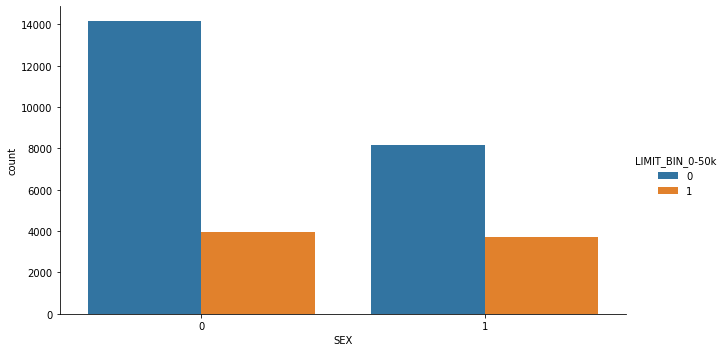

In [54]:
g = sns.catplot('SEX', data = data1, hue= 'LIMIT_BIN_0-50k', kind='count', aspect=1.75) 
g.set_xlabels('SEX')

In [55]:
#STRIP PLOT

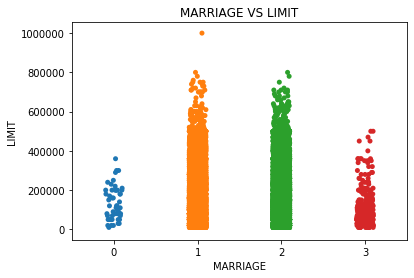

In [56]:
sns.stripplot(data1.MARRIAGE, data1.LIMIT_BAL, jitter=True)
plt.title('MARRIAGE VS LIMIT')
plt.xlabel('MARRIAGE')
plt.ylabel('LIMIT')
plt.show()

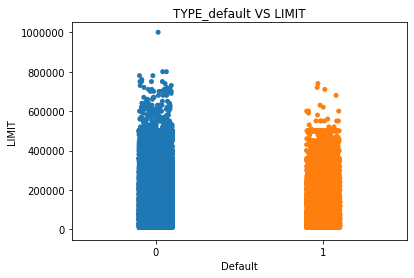

In [57]:
sns.stripplot(data1.TYPE_default, data1.LIMIT_BAL, jitter=True)
plt.title('TYPE_default VS LIMIT')
plt.xlabel('Default')
plt.ylabel('LIMIT')
plt.show()

In [58]:
#HISTOGRAMS

In [59]:
header = data1.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'TYPE2', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'TYPE_default', 'TYPE_not default', 'Generation_Gen Z',
       'Generation_Millennial', 'Generation_Gen X', 'Generation_Boomer',
       'LIMIT_BIN_0-50k', 'LIMIT_BIN_50k-100k', 'LIMIT_BIN_100k-150k',
       'LIMIT_BIN_150k-200k', 'LIMIT_BIN_200k-250k', 'LIMIT_BIN_250-300k',
       'LIMIT_BIN_300k-350k', 'LIMIT_BIN_350k-400k', 'LIMIT_BIN_400k-1000k'],
      dtype='object')


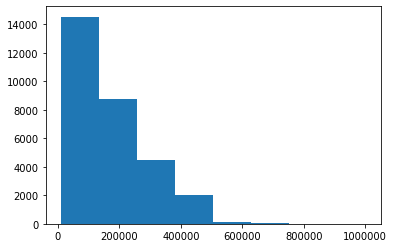

In [60]:
plt.hist(data.LIMIT_BAL, bins=8)
plt.show()

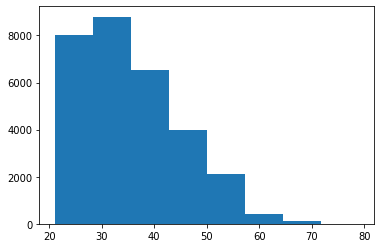

In [61]:
plt.hist(data1.AGE, bins=8)
plt.show()

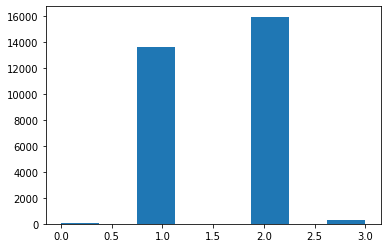

In [62]:
plt.hist(data1.MARRIAGE, bins=8)
plt.show()

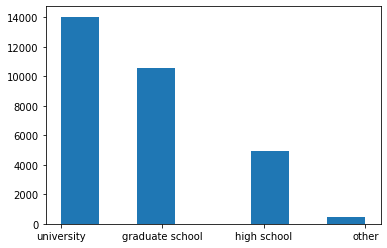

In [63]:
plt.hist(data.EDUCATION, bins=8)
plt.show()

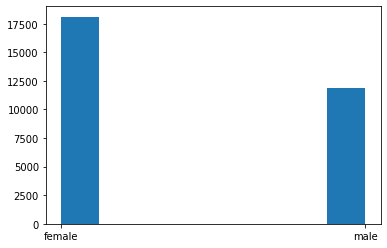

In [64]:
plt.hist(data.SEX, bins=8)
plt.show()

In [65]:
#LINE PLOTS

In [66]:
header = data1.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'TYPE2', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'TYPE_default', 'TYPE_not default', 'Generation_Gen Z',
       'Generation_Millennial', 'Generation_Gen X', 'Generation_Boomer',
       'LIMIT_BIN_0-50k', 'LIMIT_BIN_50k-100k', 'LIMIT_BIN_100k-150k',
       'LIMIT_BIN_150k-200k', 'LIMIT_BIN_200k-250k', 'LIMIT_BIN_250-300k',
       'LIMIT_BIN_300k-350k', 'LIMIT_BIN_350k-400k', 'LIMIT_BIN_400k-1000k'],
      dtype='object')


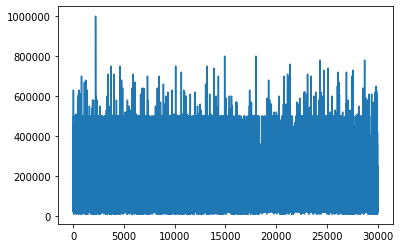

In [67]:
plt.plot(data1['LIMIT_BAL'])
plt.show()

In [68]:
#Scatter Plot

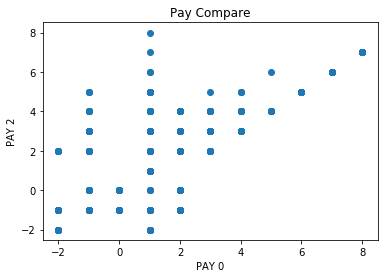

In [69]:
plt.scatter(data1.PAY_0,data1.PAY_2)
plt.title("Pay Compare")
plt.xlabel("PAY 0")
plt.ylabel("PAY 2")
plt.show()

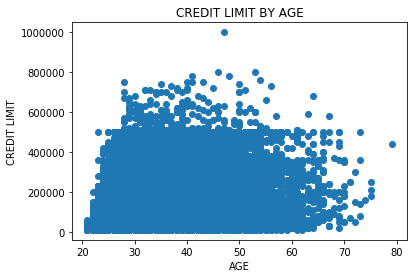

In [70]:
plt.scatter(data1.AGE,data1.LIMIT_BAL)
plt.title("CREDIT LIMIT BY AGE")
plt.xlabel("AGE")
plt.ylabel("CREDIT LIMIT")
plt.show()

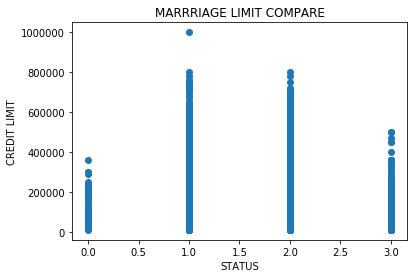

In [71]:
plt.scatter(data1.MARRIAGE,data1.LIMIT_BAL)
plt.title("MARRRIAGE LIMIT COMPARE")
plt.xlabel("STATUS")
plt.ylabel("CREDIT LIMIT")
plt.show()

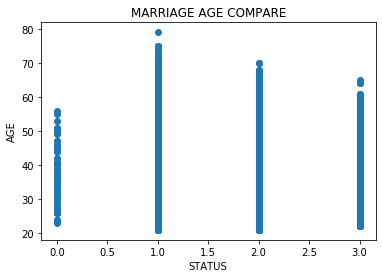

In [72]:
plt.scatter(data1.MARRIAGE,data1.AGE)
plt.title("MARRIAGE AGE COMPARE")
plt.xlabel("STATUS")
plt.ylabel("AGE")
plt.show()

In [73]:
#BOX PLOT

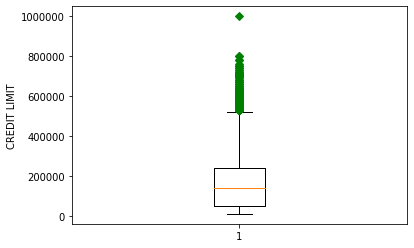

In [74]:
plt.boxplot(data1.LIMIT_BAL,0,'gD')
plt.ylabel("CREDIT LIMIT")
plt.show()

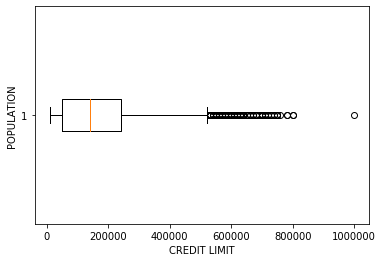

In [75]:
plt.boxplot(data1.LIMIT_BAL, vert=False)
plt.xlabel('CREDIT LIMIT')
plt.ylabel('POPULATION')
plt.show()

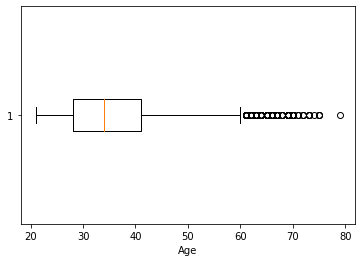

In [76]:
plt.boxplot(data1.AGE, vert=False)
plt.xlabel('Age')
plt.show()

In [77]:
data1.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Generation_Boomer,LIMIT_BIN_0-50k,LIMIT_BIN_50k-100k,LIMIT_BIN_100k-150k,LIMIT_BIN_150k-200k,LIMIT_BIN_200k-250k,LIMIT_BIN_250-300k,LIMIT_BIN_300k-350k,LIMIT_BIN_350k-400k,LIMIT_BIN_400k-1000k
0,20000,0,1,24,1,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,0,2,26,1,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,2,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,1,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,1,57,0,-1,0,-1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [78]:
corr_mat = data1.corr()
print(corr_mat)

                           LIMIT_BAL       SEX  MARRIAGE       AGE     TYPE2  \
LIMIT_BAL                   1.000000 -0.024755 -0.108139  0.144713 -0.153520   
SEX                        -0.024755  1.000000  0.031389  0.090874  0.039961   
MARRIAGE                   -0.108139  0.031389  1.000000 -0.414170 -0.024339   
AGE                         0.144713  0.090874 -0.414170  1.000000  0.013890   
TYPE2                      -0.153520  0.039961 -0.024339  0.013890  1.000000   
PAY_0                      -0.271214  0.057643  0.019917 -0.039447  0.324794   
PAY_2                      -0.296382  0.070771  0.024199 -0.050148  0.263551   
PAY_3                      -0.286123  0.066096  0.032688 -0.053048  0.235253   
PAY_4                      -0.267460  0.060173  0.033122 -0.049722  0.216614   
PAY_5                      -0.249411  0.055064  0.035629 -0.053826  0.204149   
PAY_6                      -0.235195  0.044008  0.034345 -0.048773  0.186866   
EDUCATION_graduate school   0.258777  0.

In [79]:
cov_mat = data1.cov()
print(cov_mat)

                              LIMIT_BAL          SEX     MARRIAGE  \
LIMIT_BAL                  1.683446e+10 -1571.050630 -7323.669658   
SEX                       -1.571051e+03     0.239247     0.008014   
MARRIAGE                  -7.323670e+03     0.008014     0.272452   
AGE                        1.730767e+05     0.409726    -1.992764   
TYPE2                     -8.267552e+03     0.008113    -0.005273   
PAY_0                     -3.954593e+04     0.031685     0.011683   
PAY_2                     -4.603765e+04     0.041442     0.015122   
PAY_3                     -4.443225e+04     0.038694     0.020421   
PAY_4                     -4.057181e+04     0.034411     0.020213   
PAY_5                     -3.667056e+04     0.030521     0.021074   
PAY_6                     -3.509308e+04     0.024754     0.020616   
EDUCATION_graduate school  1.604448e+04     0.005317     0.035451   
EDUCATION_high school     -6.709315e+03     0.001385    -0.021418   
EDUCATION_other            2.15785

In [80]:
data1.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,Generation_Boomer,LIMIT_BIN_0-50k,LIMIT_BIN_50k-100k,LIMIT_BIN_100k-150k,LIMIT_BIN_150k-200k,LIMIT_BIN_200k-250k,LIMIT_BIN_250-300k,LIMIT_BIN_300k-350k,LIMIT_BIN_350k-400k,LIMIT_BIN_400k-1000k
0,20000,0,1,24,1,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,0,2,26,1,-1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,2,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,50000,0,1,37,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,1,57,0,-1,0,-1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [81]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int32
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   TYPE2                      30000 non-null  int64
 5   PAY_0                      30000 non-null  int64
 6   PAY_2                      30000 non-null  int64
 7   PAY_3                      30000 non-null  int64
 8   PAY_4                      30000 non-null  int64
 9   PAY_5                      30000 non-null  int64
 10  PAY_6                      30000 non-null  int64
 11  EDUCATION_graduate school  30000 non-null  uint8
 12  EDUCATION_high school      30000 non-null  uint8
 13  EDUCATION_other            30000 non-null  uint8
 14  EDUCATION_university  

In [82]:
datapayment = data1.iloc[:,[4,5,6,7,8,9,10,21]]

In [83]:
datapayment.head()

,TYPE2,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BIN_0-50k
0,1,2,2,-1,-1,-2,-2,1
1,1,-1,2,0,0,0,2,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,-1,0,-1,0,0,0,1


In [84]:
datapayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TYPE2            30000 non-null  int64
 1   PAY_0            30000 non-null  int64
 2   PAY_2            30000 non-null  int64
 3   PAY_3            30000 non-null  int64
 4   PAY_4            30000 non-null  int64
 5   PAY_5            30000 non-null  int64
 6   PAY_6            30000 non-null  int64
 7   LIMIT_BIN_0-50k  30000 non-null  uint8
dtypes: int64(7), uint8(1)
memory usage: 3.1 MB


In [85]:
#MODELING
# features
X = datapayment.iloc[:,1:8]
print('Summary of feature sample')
X.head()

Summary of feature sample


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BIN_0-50k
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,-1,0,-1,0,0,0,1


In [86]:
# dependent variable
y = datapayment['TYPE2']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: TYPE2, dtype: int64

In [87]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('Decision Tree Classifier', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       r

In [88]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [89]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8139333333333333
Decision Tree Classifier 0.8138666666666667
Gradient Boosting Classifier 0.8200333333333333


In [90]:
#Train Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [91]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [92]:
#Predictions
preds = model.predict(X_test)
print ('Accuracy Gradient'), accuracy_score(y_test, preds)

Accuracy Gradient


(None, 0.8208888888888889)

In [93]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

